In [1]:
import json, sys, random
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.


In [3]:
from PIL import Image, ImageDraw 

In [4]:
from matplotlib import pyplot as plt

### Download and study the dataset

In [5]:
# download dataset from json object
f = open(r'D:\project\ships-in-satellite-imagery\shipsnet.json')
dataset = json.load(f)
f.close()

In [6]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

INPUT

The dataset contains 2800 images. One image is represented as a vector of length 19200 elements.

In [7]:
input_data.shape

(4000, 19200)

In [8]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [9]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

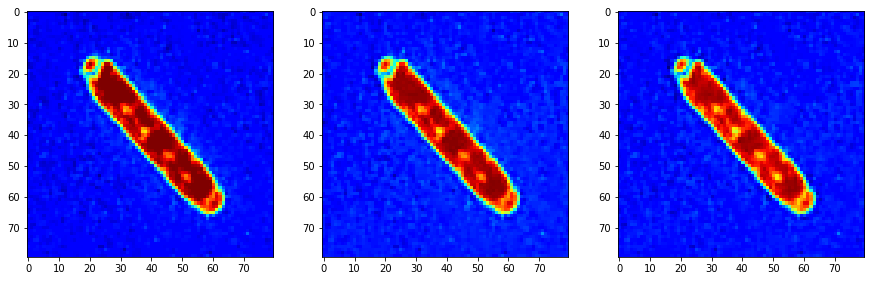

In [10]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

OUTPUT

The output is a vector of lenght 2800 elements.

In [11]:
output_data.shape

(4000,)

The vector contains int 0 and 1

In [12]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

Vector contains of 2100 zeros and 700 units. This means that in a dataset of 700 images tagged with "ship" and 2100 images marked as "not ship".

In [13]:
np.bincount(output_data)

array([3000, 1000], dtype=int64)

### Preparing data

In [14]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [15]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [16]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [17]:
# normalization
X_train = X_train / 255

### Traing network

In [18]:
np.random.seed(42)

In [19]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [20]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)


Train on 2240 samples, validate on 560 samples
Epoch 1/18
 - 93s - loss: 0.3457 - accuracy: 0.8500 - val_loss: 0.1477 - val_accuracy: 0.9482
Epoch 2/18
 - 98s - loss: 0.1455 - accuracy: 0.9496 - val_loss: 0.0881 - val_accuracy: 0.9750
Epoch 3/18
 - 76s - loss: 0.1198 - accuracy: 0.9589 - val_loss: 0.1036 - val_accuracy: 0.9607
Epoch 4/18
 - 79s - loss: 0.0951 - accuracy: 0.9670 - val_loss: 0.0615 - val_accuracy: 0.9732
Epoch 5/18
 - 68s - loss: 0.0833 - accuracy: 0.9732 - val_loss: 0.0664 - val_accuracy: 0.9786
Epoch 6/18
 - 96s - loss: 0.0656 - accuracy: 0.9754 - val_loss: 0.0748 - val_accuracy: 0.9696
Epoch 7/18
 - 97s - loss: 0.0634 - accuracy: 0.9821 - val_loss: 0.0448 - val_accuracy: 0.9821
Epoch 8/18
 - 93s - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0310 - val_accuracy: 0.9911
Epoch 9/18
 - 91s - loss: 0.0473 - accuracy: 0.9871 - val_loss: 0.0475 - val_accuracy: 0.9875
Epoch 10/18
 - 78s - loss: 0.0408 - accuracy: 0.9857 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 11/18

# Using network

### download image

In [34]:
image = Image.open('D:\project\ships-in-satellite-imagery\scenes\scenes\sfbay_2.png')
pix = image.load()

In [35]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [36]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [37]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

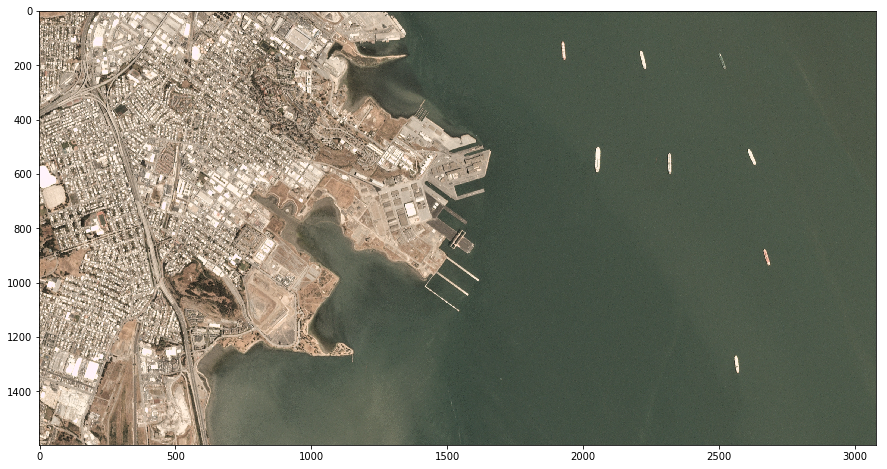

In [38]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [39]:
picture_tensor = picture_tensor.transpose(2,0,1)

### Search on the image

In [40]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [41]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [42]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:1890 Y:100  [[6.628688e-05 9.999337e-01]]


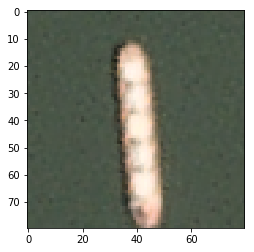

X:1180 Y:130  [[0.04734948 0.95265055]]


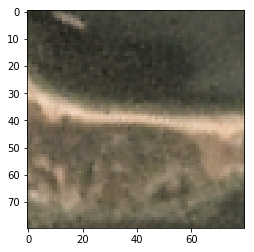

X:1270 Y:130  [[0.006077 0.993923]]


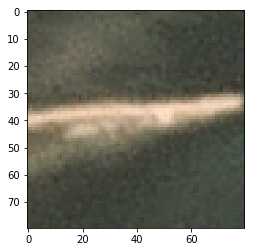

X:2180 Y:130  [[0.01520941 0.9847906 ]]


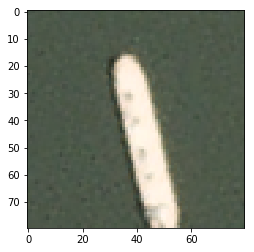

X:2470 Y:140  [[0.00836298 0.99163705]]


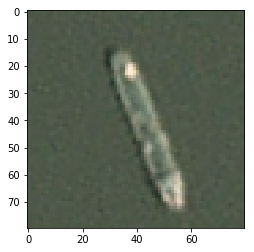

X:1520 Y:430  [[0.01822194 0.981778  ]]


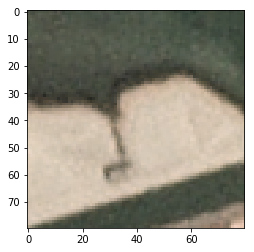

X:2020 Y:480  [[0.00159733 0.99840266]]


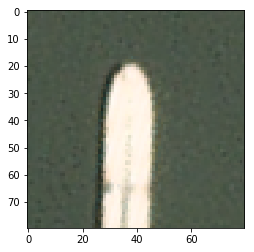

X:2580 Y:490  [[7.234277e-04 9.992766e-01]]


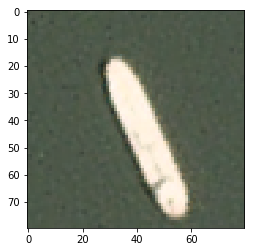

X:2280 Y:510  [[5.217027e-04 9.994783e-01]]


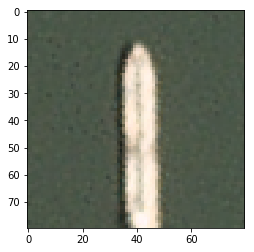

X:1550 Y:630  [[0.00230567 0.9976943 ]]


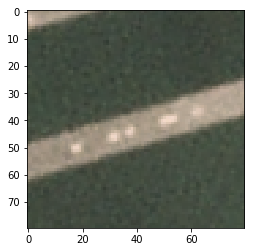

X:1510 Y:790  [[0.0169306 0.9830694]]


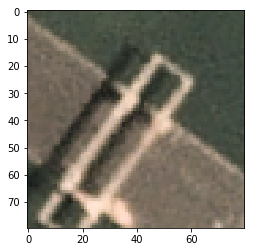

X:2640 Y:860  [[6.3697378e-05 9.9993634e-01]]


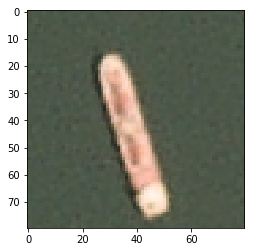

X:1480 Y:880  [[0.00165563 0.9983444 ]]


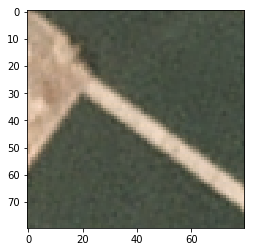

X:1380 Y:960  [[0.08319764 0.9168024 ]]


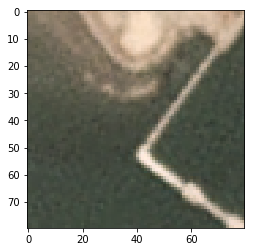

X:1480 Y:970  [[0.04734855 0.9526515 ]]


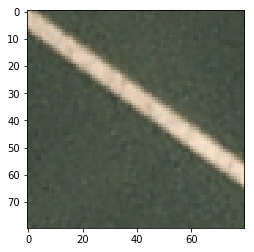

X:1070 Y:1200  [[5.2085996e-04 9.9947912e-01]]


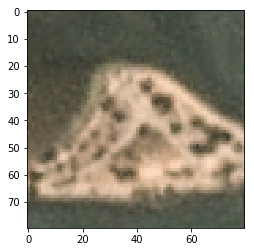

X:2530 Y:1250  [[1.5180529e-04 9.9984813e-01]]


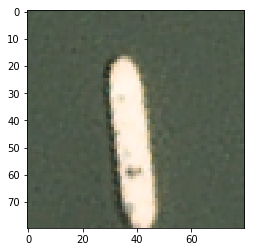

X:3000 Y:1510  

In [43]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [44]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [45]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1597, 3081, 3)

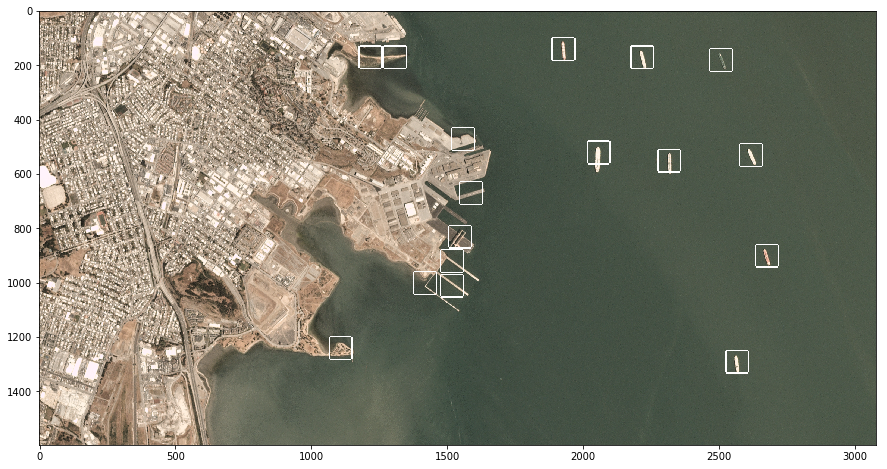

In [46]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()